In [140]:
from wordcloud import WordCloud
from wordcloud import ImageColorGenerator
from wordcloud import STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt

def getStr(data):
    """DF TO COMBINED STRING"""
    s = ""
    for i in data.text:
        s = s + " " + i
    return s

def cleanStr(string):
    string = string.lower()
    string = string.replace("https", "")
    string = string.replace("http", "")
    string = string.replace("<br>", "")
    string = string.replace("<br />", "")
    string = string.replace("</br>", "")
    return string

def dataframe_to_wordcloud(name, data):
    s = getStr(data)
    s = cleanStr(s)
    stopwords = set(STOPWORDS)
    wordcloud = WordCloud(width=1000, height=1000, stopwords=stopwords, colormap="bone" ,background_color="white").generate(s)
    # plt.figure( figsize=(20,20))
    # plt.axis("off")
    # plt.to(f"./Outputs/wordClouds/{name}.png")
    
    wordcloud.to_file(f"./Outputs/wordClouds/{name}.png")


from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

def dataframe_to_hist(name, data):
    stop_words = set(stopwords.words('english'))
    stop_words.update(["<br>","<br />", "https", "http", "br", "'s", "``", "...", '"', "''", '"', "!", '!',
    '!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', ' ', '-', '.', '/', ':', 
    ';', '<', '=', '>', '?', '@', '[', '\\', ']', '^', '_', '`', '{', '|', '}', '~'])

    description_list = data['text'].values.tolist()
    word_tokens = word_tokenize(" ".join(description_list))
    filtered_sentence = [w for w in word_tokens if not w.lower() in stop_words]


    # Assign the Counter instance `most_common` call to a variable:
    word_frequency = Counter(filtered_sentence).most_common(20)
    
    print(name, word_frequency)
    # `most_common` returns a list of (word, count) tuples
    words = [word for word, _ in word_frequency]
    counts = [counts for _, counts in word_frequency]

    plt.barh(words, counts, color="gray")
    plt.title("20 most frequent tokens in "+ name)
    plt.ylabel("Frequency")
    plt.xlabel("Words")
    plt.xticks(rotation='vertical')
    plt.savefig(f"./Outputs/Histogram/" + name +".png")

def dataframe_to_histr(name, data):
    stop_words = set(stopwords.words('english'))
    stop_words.update(["<br>","<br />", "https", "http", "br", "'s", "``", "...", '"', "''", '"', "!", '!',
    '!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', ' ', '-', '.', '/', ':', 
    ';', '<', '=', '>', '?', '@', '[', '\\', ']', '^', '_', '`', '{', '|', '}', '~'])

    description_list = data['text'].values.tolist()
    word_tokens = word_tokenize(" ".join(description_list))
    filtered_sentence = [w for w in word_tokens if not w.lower() in stop_words]


    # Assign the Counter instance `most_common` call to a variable:
    word_frequency = Counter(filtered_sentence).most_common(20)
    
    print(name, word_frequency)
    # `most_common` returns a list of (word, count) tuples
    words = [word for word, _ in word_frequency]
    counts = [counts for _, counts in word_frequency]

    plt.barh(words, counts, color="gray")
    plt.title("20 most frequent tokens in "+ name)
    plt.ylabel("Frequency")
    plt.xlabel("Words")
    plt.xticks(rotation='vertical')
    plt.savefig(f"./Outputs/Histogram/" + name +".png")

    # ax.invert_yaxis()  # labels read top-to-bottom
    # ax.invert_xaxis()  # labels read top-to-bottom

    # ax2 = ax.twinx()
    # ax2.set_ylim(ax.get_ylim())
    # ax2.set_yticks(y_pos)
    # ax2.set_yticklabels(people)


# dataframe_to_hist("test2", df)

# IMDB Dataset from CSV

In [4]:
import pandas as pd
import pandas_profiling as prof
imdb = pd.read_csv("./Sentiment_Dataset/IMDB/Raw/archive/movie.csv")

/home/maxwell/Thesis/restructure/venv_pysentimiento/lib/python3.7/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/maxwell/Thesis/restructure/venv_pysentimiento/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  


In [6]:
profIMDB = prof.ProfileReport(imdb)
profIMDB.to_file(output_file='./Outputs/IMDB_Data_Analysis.html')
imdb0 = imdb.loc[imdb["label"] == 0]
imdb1 = imdb.loc[imdb["label"] == 1]
# LENGTH OF EACH LABEL
print("Length of Each label")
print("0",len(imdb0))
print("1",len(imdb1))

Export report to file: 100%|██████████| 1/1 [00:00<00:00, 1428.58it/s]


In [46]:
dataframe_to_wordcloud("imdb_0", imdb0)
dataframe_to_wordcloud("imdb_1", imdb1)

imdb neg [('movie', 38168), ("n't", 31569), ('film', 28603), ('one', 18463), ('like', 17004), ('would', 11987), ('good', 11104), ('even', 10736), ('bad', 10689), ('really', 9475), ('time', 9103), ('could', 8885), ('see', 8239), ('get', 7837), ('much', 7739), ('story', 7597), ('make', 7138), ('people', 7122), ('made', 6616), ('movies', 6229)]
imdb pos [('film', 31967), ('movie', 29063), ("n't", 21282), ('one', 19209), ('like', 13270), ('good', 11078), ('story', 9694), ('great', 9464), ('time', 9287), ('see', 9213), ('would', 8919), ('really', 8423), ('well', 8013), ('also', 7626), ('much', 7025), ('even', 6709), ('first', 6625), ('people', 6572), ('get', 6480), ('love', 6307)]


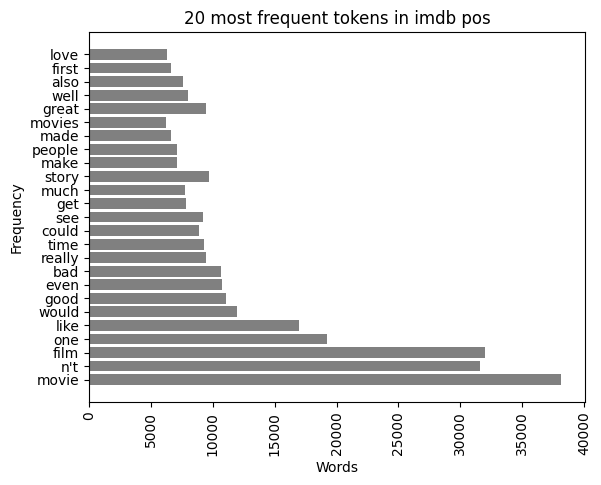

In [141]:
dataframe_to_hist("imdb neg", imdb0)
dataframe_to_histr("imdb pos", imdb1)

In [145]:
imdbNeg = [('movie', 38168), ("n't", 31569), ('film', 28603), ('one', 18463), ('like', 17004), ('would', 11987), ('good', 11104), ('even', 10736), ('bad', 10689), ('really', 9475), ('time', 9103), ('could', 8885), ('see', 8239), ('get', 7837), ('much', 7739), ('story', 7597), ('make', 7138), ('people', 7122), ('made', 6616), ('movies', 6229)]
imdbPos = [('film', 31967), ('movie', 29063), ("n't", 21282), ('one', 19209), ('like', 13270), ('good', 11078), ('story', 9694), ('great', 9464), ('time', 9287), ('see', 9213), ('would', 8919), ('really', 8423), ('well', 8013), ('also', 7626), ('much', 7025), ('even', 6709), ('first', 6625), ('people', 6572), ('get', 6480), ('love', 6307)]

imdbNegWords = []
imdbPosWords = []
imdbNegCount = []
imdbPosCount = []

for i, j in imdbNeg:
    imdbNegWords.append(i)
    imdbNegCount.append(j)

for i, j in imdbPos:
    imdbPosWords.append(i)
    imdbPosCount.append(j)

allWords = set(imdbNegWords + imdbPosWords)


for word in allWords:
    countNeg = 0
    countPos = 0 
    if word in imdbNegWords:
        countNeg = imdbNegCount[imdbNegWords.index(word)]
    if word in imdbPosWords:
        countPos = imdbPosCount[imdbPosWords.index(word)]
    print(f"{word}\t{countNeg}\t{countPos}")



even	10736	6709
also	0	7626
story	7597	9694
make	7138	0
time	9103	9287
like	17004	13270
movies	6229	0
well	0	8013
really	9475	8423
bad	10689	0
get	7837	6480
first	0	6625
movie	38168	29063
would	11987	8919
film	28603	31967
much	7739	7025
n't	31569	21282
good	11104	11078
great	0	9464
made	6616	0
see	8239	9213
love	0	6307
could	8885	0
people	7122	6572
one	18463	19209


# SemEval Dataset from CSV

In [51]:
import pandas as pd
import pandas_profiling as prof
semEval = pd.read_csv("./Sentiment_Dataset/SemEval17/Raw/SemEval2017-task4-dev.subtask-A.english.INPUT.txt", 
                    names = ["id", "label", "text", "date"], sep = "\t")

In [52]:
semEval

,id,label,text,date
0,619950566786113536,neutral,"Picturehouse's, Pink Floyd's, 'Roger Waters: T...",NaN
1,619969366986235905,neutral,Order Go Set a Watchman in store or through ou...,NaN
2,619971047195045888,negative,If these runway renovations at the airport pre...,NaN
3,619974445185302528,neutral,If you could ask an onstage interview question...,NaN
4,619987808317407232,positive,A portion of book sales from our Harper Lee/Go...,NaN
...,...,...,...,...
20627,681877834982232064,neutral,@ShaquilleHoNeal from what I think you're aski...,NaN
20628,681879579129200640,positive,"Iran ranks 1st in liver surgeries, Allah bless...",NaN
20629,681883903259357184,neutral,Hours before he arrived in Saudi Arabia on Tue...,NaN
20630,681904976860327936,negative,@VanityFair Alex Kim Kardashian worth how to ...,NaN


In [54]:
profSemEval = prof.ProfileReport(semEval)
profSemEval.to_file(output_file='./Outputs/SemEval17_Data_Analysis.html')
semEval0 = semEval.loc[semEval["label"] =="negative"]
semEval1 = semEval.loc[semEval["label"] == "positive"]
semEval2 = semEval.loc[semEval["label"] == "neutral"]

Export report to file: 100%|██████████| 1/1 [00:00<00:00, 1307.45it/s]


In [58]:
dataframe_to_wordcloud("semEval_negative", semEval0)
dataframe_to_wordcloud("semEval_positive", semEval1)
dataframe_to_wordcloud("semEval_neutral", semEval2)

semEval neg [('may', 768), ("n't", 592), ('tomorrow', 296), ('like', 252), ('1st', 216), ('amp', 198), ("'m", 185), ('Muslims', 170), ('Sunday', 151), ('going', 147), ('get', 144), ('2nd', 142), ('time', 139), ('Friday', 137), ('see', 136), ('people', 132), ('one', 131), ('day', 130), ('..', 122), ('IRA', 119)]
semEval pos [('tomorrow', 1205), ('may', 726), ('see', 619), ('day', 580), ("n't", 567), ("'m", 563), ('Friday', 531), ('amp', 460), ('going', 425), ('night', 417), ('Sunday', 415), ('time', 378), ('1st', 377), ('Day', 365), ('like', 349), ('Monday', 337), ('2nd', 330), ('good', 323), ('love', 312), ('one', 296)]
semEval neu [('may', 1495), ('tomorrow', 1149), ("n't", 932), ('amp', 638), ('1st', 623), ('Sunday', 612), ('Friday', 553), ('going', 521), ('like', 514), ('time', 451), ('get', 449), ("'m", 449), ('2nd', 442), ('night', 441), ('see', 434), ('Monday', 432), ('3rd', 428), ('know', 412), ('day', 405), ('David', 403)]


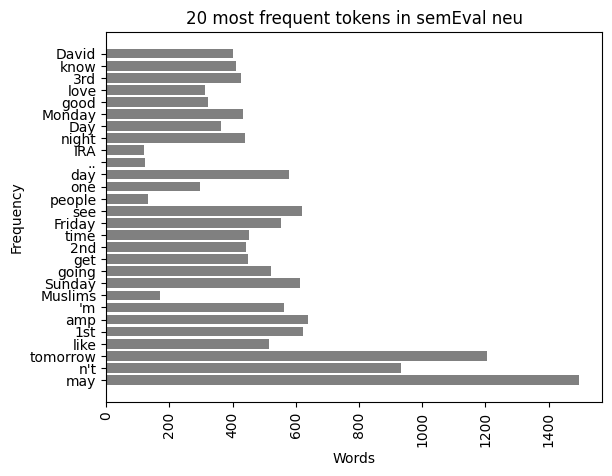

In [149]:
dataframe_to_hist("semEval neg", semEval0)
dataframe_to_histr("semEval pos", semEval1)
dataframe_to_histr("semEval neu", semEval2)

In [151]:

semEvalNeg = [('may', 768), ("n't", 592), ('tomorrow', 296), ('like', 252), ('1st', 216), ('amp', 198), ("'m", 185), ('Muslims', 170), ('Sunday', 151), ('going', 147), ('get', 144), ('2nd', 142), ('time', 139), ('Friday', 137), ('see', 136), ('people', 132), ('one', 131), ('day', 130), ('..', 122), ('IRA', 119)]
semEvalPos = [('tomorrow', 1205), ('may', 726), ('see', 619), ('day', 580), ("n't", 567), ("'m", 563), ('Friday', 531), ('amp', 460), ('going', 425), ('night', 417), ('Sunday', 415), ('time', 378), ('1st', 377), ('Day', 365), ('like', 349), ('Monday', 337), ('2nd', 330), ('good', 323), ('love', 312), ('one', 296)]
semEvalNeu = [('may', 1495), ('tomorrow', 1149), ("n't", 932), ('amp', 638), ('1st', 623), ('Sunday', 612), ('Friday', 553), ('going', 521), ('like', 514), ('time', 451), ('get', 449), ("'m", 449), ('2nd', 442), ('night', 441), ('see', 434), ('Monday', 432), ('3rd', 428), ('know', 412), ('day', 405), ('David', 403)]


semEvalNegWords = []
semEvalPosWords = []
semEvalNeuWords = []
semEvalNegCount = []
semEvalPosCount = []
semEvalNeuCount = []

for i, j in semEvalNeg:
    semEvalNegWords.append(i)
    semEvalNegCount.append(j)

for i, j in semEvalPos:
    semEvalPosWords.append(i)
    semEvalPosCount.append(j)
    
for i, j in semEvalNeu:
    semEvalNeuWords.append(i)
    semEvalNeuCount.append(j)

allWords = set(semEvalNegWords + semEvalPosWords)

prt = []
for word in allWords:
    countNeg = 0
    countPos = 0
    countNeu = 0 
    if word in semEvalNegWords:
        countNeg = semEvalNegCount[semEvalNegWords.index(word)]
    if word in semEvalPosWords:
        countPos = semEvalPosCount[semEvalPosWords.index(word)]
    if word in semEvalNeuWords:
        countNeu = semEvalNeuCount[semEvalNeuWords.index(word)]
    prt.append([word,countNeg,countPos, countNeu])

print(prt)

[['Sunday', 151, 415, 612], ['2nd', 142, 330, 442], ['Day', 0, 365, 0], ['time', 139, 378, 451], ['Monday', 0, 337, 432], ['like', 252, 349, 514], ['1st', 216, 377, 623], ['get', 144, 0, 449], ['tomorrow', 296, 1205, 1149], ["'m", 185, 563, 449], ['Friday', 137, 531, 553], ['may', 768, 726, 1495], ["n't", 592, 567, 932], ['going', 147, 425, 521], ['Muslims', 170, 0, 0], ['good', 0, 323, 0], ['..', 122, 0, 0], ['IRA', 119, 0, 0], ['day', 130, 580, 405], ['night', 0, 417, 441], ['see', 136, 619, 434], ['love', 0, 312, 0], ['amp', 198, 460, 638], ['people', 132, 0, 0], ['one', 131, 296, 0]]


# Rotten Tomatoes

In [74]:
from datasets import load_dataset
dataset = load_dataset('rotten_tomatoes', split='train')

rotten = pd.DataFrame(columns = ["text", "label"])
rotten["text"] = dataset["text"]
rotten["label"] = dataset["label"]

Using custom data configuration default
Reusing dataset rotten_tomatoes_movie_review (/home/maxwell/.cache/huggingface/datasets/rotten_tomatoes_movie_review/default/1.0.0/40d411e45a6ce3484deed7cc15b82a53dad9a72aafd9f86f8f227134bec5ca46)


In [75]:
profrotten = prof.ProfileReport(rotten)
profrotten.to_file(output_file='./Outputs/rotten_Data_Analysis.html')
rotten0 = rotten.loc[rotten["label"] == 0]
rotten1 = rotten.loc[rotten["label"] == 1]

Export report to file: 100%|██████████| 1/1 [00:00<00:00, 2081.54it/s]

Length of Each label
0 4265
1 4265


In [76]:
dataframe_to_wordcloud("rotten_0", rotten0)
dataframe_to_wordcloud("rotten_1", rotten1)

rotten neg [('movie', 646), ('film', 558), ("n't", 455), ('like', 359), ('one', 294), ('--', 265), ('story', 189), ('much', 177), ('bad', 173), ('even', 161), ('time', 146), ('good', 144), ('little', 138), ('characters', 138), ('would', 130), ('never', 122), ('comedy', 122), ('enough', 109), ('really', 105), ('make', 103)]
rotten pos [('film', 690), ('movie', 432), ("n't", 286), ('one', 280), ('--', 271), ('like', 213), ('story', 195), ('comedy', 160), ('good', 152), ('even', 144), ('funny', 140), ('way', 135), ('best', 127), ('time', 127), ('characters', 125), ('make', 124), ('life', 124), ('us', 123), ('much', 122), ('love', 119)]


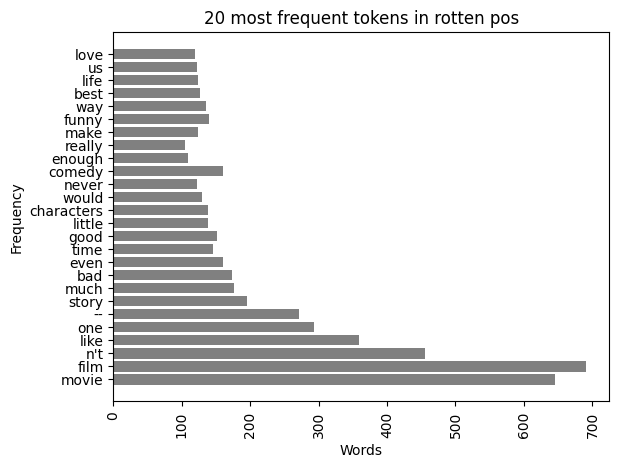

In [146]:
dataframe_to_hist("rotten neg", rotten0)
dataframe_to_histr("rotten pos", rotten1)

In [148]:
rottenNeg = [('movie', 646), ('film', 558), ("n't", 455), ('like', 359), ('one', 294), ('--', 265), ('story', 189), ('much', 177), ('bad', 173), ('even', 161), ('time', 146), ('good', 144), ('little', 138), ('characters', 138), ('would', 130), ('never', 122), ('comedy', 122), ('enough', 109), ('really', 105), ('make', 103)]
rottenPos =  [('film', 690), ('movie', 432), ("n't", 286), ('one', 280), ('--', 271), ('like', 213), ('story', 195), ('comedy', 160), ('good', 152), ('even', 144), ('funny', 140), ('way', 135), ('best', 127), ('time', 127), ('characters', 125), ('make', 124), ('life', 124), ('us', 123), ('much', 122), ('love', 119)]


rottenNegWords = []
rottenPosWords = []
rottenNegCount = []
rottenPosCount = []

for i, j in rottenNeg:
    rottenNegWords.append(i)
    rottenNegCount.append(j)

for i, j in rottenPos:
    rottenPosWords.append(i)
    rottenPosCount.append(j)

allWords = set(rottenNegWords + rottenPosWords)

prt = []
for word in allWords:
    countNeg = 0
    countPos = 0 
    if word in rottenNegWords:
        countNeg = rottenNegCount[rottenNegWords.index(word)]
    if word in rottenPosWords:
        countPos = rottenPosCount[rottenPosWords.index(word)]
    prt.append([word,countNeg,countPos])

print(prt)

[['even', 161, 144], ['little', 138, 0], ['story', 189, 195], ['make', 103, 124], ['time', 146, 127], ['enough', 109, 0], ['like', 359, 213], ['never', 122, 0], ['really', 105, 0], ['bad', 173, 0], ['movie', 646, 432], ['would', 130, 0], ['funny', 0, 140], ['film', 558, 690], ['much', 177, 122], ["n't", 455, 286], ['good', 144, 152], ['characters', 138, 125], ['best', 0, 127], ['comedy', 122, 160], ['way', 0, 135], ['life', 0, 124], ['love', 0, 119], ['one', 294, 280], ['us', 0, 123], ['--', 265, 271]]


# Bangla NMT

In [77]:
with open("Translation_Dataset/BanglaNMT/RAW/original_corpus.bn") as file:
    bn = file.read()
    bn = bn.split("\n")
    print(len(bn))

2753070


In [153]:
with open("Translation_Dataset/BanglaNMT/RAW/original_corpus.bn") as file:
    bn = file.read()
    bn.replace("\n", " ")
    bn = set(bn.split(" "))
    print(len(bn))

2813186


In [78]:
with open("Translation_Dataset/BanglaNMT/RAW/original_corpus.en") as file:
    en = file.read()
    en = en.split("\n")
    print(len(en))

2753070


In [154]:
with open("Translation_Dataset/BanglaNMT/RAW/original_corpus.en") as file:
    en = file.read()
    en.replace("\n", " ")
    en = set(en.split(" "))
    print(len(en))

2566038


In [79]:
nmt = pd.DataFrame(columns = ["bangla", "english"])

In [81]:
nmt["bangla"] = bn
nmt["english"] = en

In [84]:
nmt = nmt.loc[1:10000]

In [85]:
profNMT = prof.ProfileReport(nmt)
profNMT.to_file(output_file='./Outputs/BanglaNMT_Data_Analysis.html')

/home/maxwell/Thesis/restructure/venv_pysentimiento/lib/python3.7/site-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
Export report to file: 100%|██████████| 1/1 [00:00<00:00, 1429.06it/s]


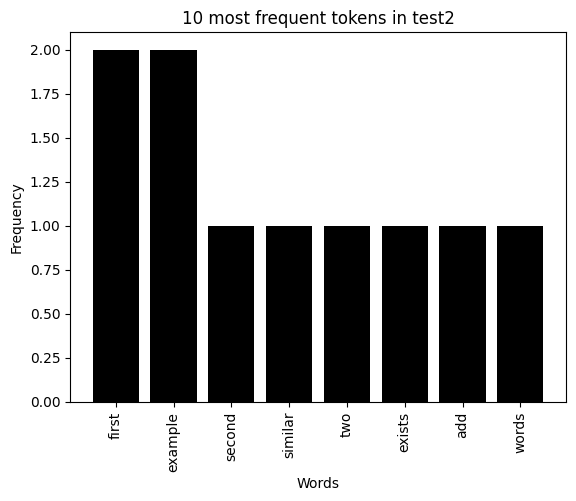

In [106]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
 
 


def dataframe_to_hist(name, data):
    stop_words = set(stopwords.words('english'))
    
    description_list = data['text'].values.tolist()
    word_tokens = word_tokenize(" ".join(description_list))
    filtered_sentence = [w for w in word_tokens if not w.lower() in stop_words]


    # Assign the Counter instance `most_common` call to a variable:
    word_frequency = Counter(filtered_sentence).most_common(20)

    # `most_common` returns a list of (word, count) tuples
    words = [word for word, _ in word_frequency]
    counts = [counts for _, counts in word_frequency]

    plt.bar(words, counts, color="black")
    plt.title("10 most frequent tokens in "+ name)
    plt.ylabel("Frequency")
    plt.xlabel("Words")
    plt.xticks(rotation='vertical')
    plt.savefig(f"./Outputs/Histogram/" + name +".png")
dataframe_to_hist("test2", df)